# Large Language Models(LLM)

## Motivação

Em 2017, a publicação do artigo "Attention is All You Need" revolucionou o campo do Processamento de Linguagem Natural (NLP) com a introdução dos Transformers. Essa arquitetura neural, com sua capacidade de processar sequências de dados de forma mais eficiente, impulsionou o desenvolvimento de modelos de linguagem cada vez mais sofisticados e poderosos. A partir daí, os Grandes Modelos de Linguagem (LLMs) experimentaram um vasto crescimento, atraindo investimentos consideráveis e abrindo novas fronteiras para a área. Para se manter atualizado nesse cenário, é fundamental compreender o funcionamento dos LLM, de forma a aprimorar e desenvolver novas aplicações.

## Resultados Esperados



Neste laboratório, espera-se que os alunos compreendam os princípios básicos do funcionamento de um Grande Modelo de Linguagem. Para exemplificar, será apresentado um código em pequena escala de um LLM. Após as explicações, os alunos deverão realizar os exercícios propostos.

## Fundamentação teórica

O artigo Attention is All You Need introduziu um novo paradigma em modelos de linguagem. Esse artigo apresentou uma nova arquitetura de redes neurais, o Transformer, que demonstrou desempenhos notáveis em tarefas de tradução. Dessa forma, pesquisadores da área começaram a aplicar essa nova arquitetura em outras tarefas de processamento de texto, novamente obtendo resultados excepcionais. Com isso, surgiu o termo Large Language Models (LLMs) para se referir a modelos baseados na arquitetura Transformer, que foram treinados com grandes corpora de texto.

Os LLMs impulsionaram mais uma era dourada da IA. No entanto, é importante destacar que não existe uma única arquitetura fechada para um modelo LLM. As principais arquiteturas são a GPT, desenvolvida pela OpenAI, e a BERT, desenvolvida pelo Google. Além disso, existem diversos outros modelos desenvolvidos por programadores e empresas, como os modelos do Hugging Face, nanoGPT, entre outros. O modelo que será apresentada é mais uma variação baseado em Transformers, mas consideravelmente menor. Portanto, o código, as explicações e os diagramas devem ser vistos como um primeiro passo no aprendizado de arquiteturas mais sofisticadas.

Para facilitar o entendimento, serão apresentados um diagrama geral do modelo bem como diagramas dos componentes mais importantes.


A figura abaixo ilustra o funcionamento da modelo criado, com as caixas azuis representando a entrada e a saída. A saída da Rede de Geração de Texto (TextGenNet TGN) de  são logits, que são os resultados brutos da classificação. No treinamento, a rede calcula a perda (loss) ao comparar os logits preditos com os valores reais (targets), ajustando seus parâmetros para minimizar essa perda ao longo das épocas. No modo de teste, a saída do método Forward passa por uma função softmax para gerar um vetor de probabilidades, permitindo selecionar os tokens de maior probabilidade como saída. Finalmente, essa saída numérica é decodificada para produzir texto em linguagem natural.





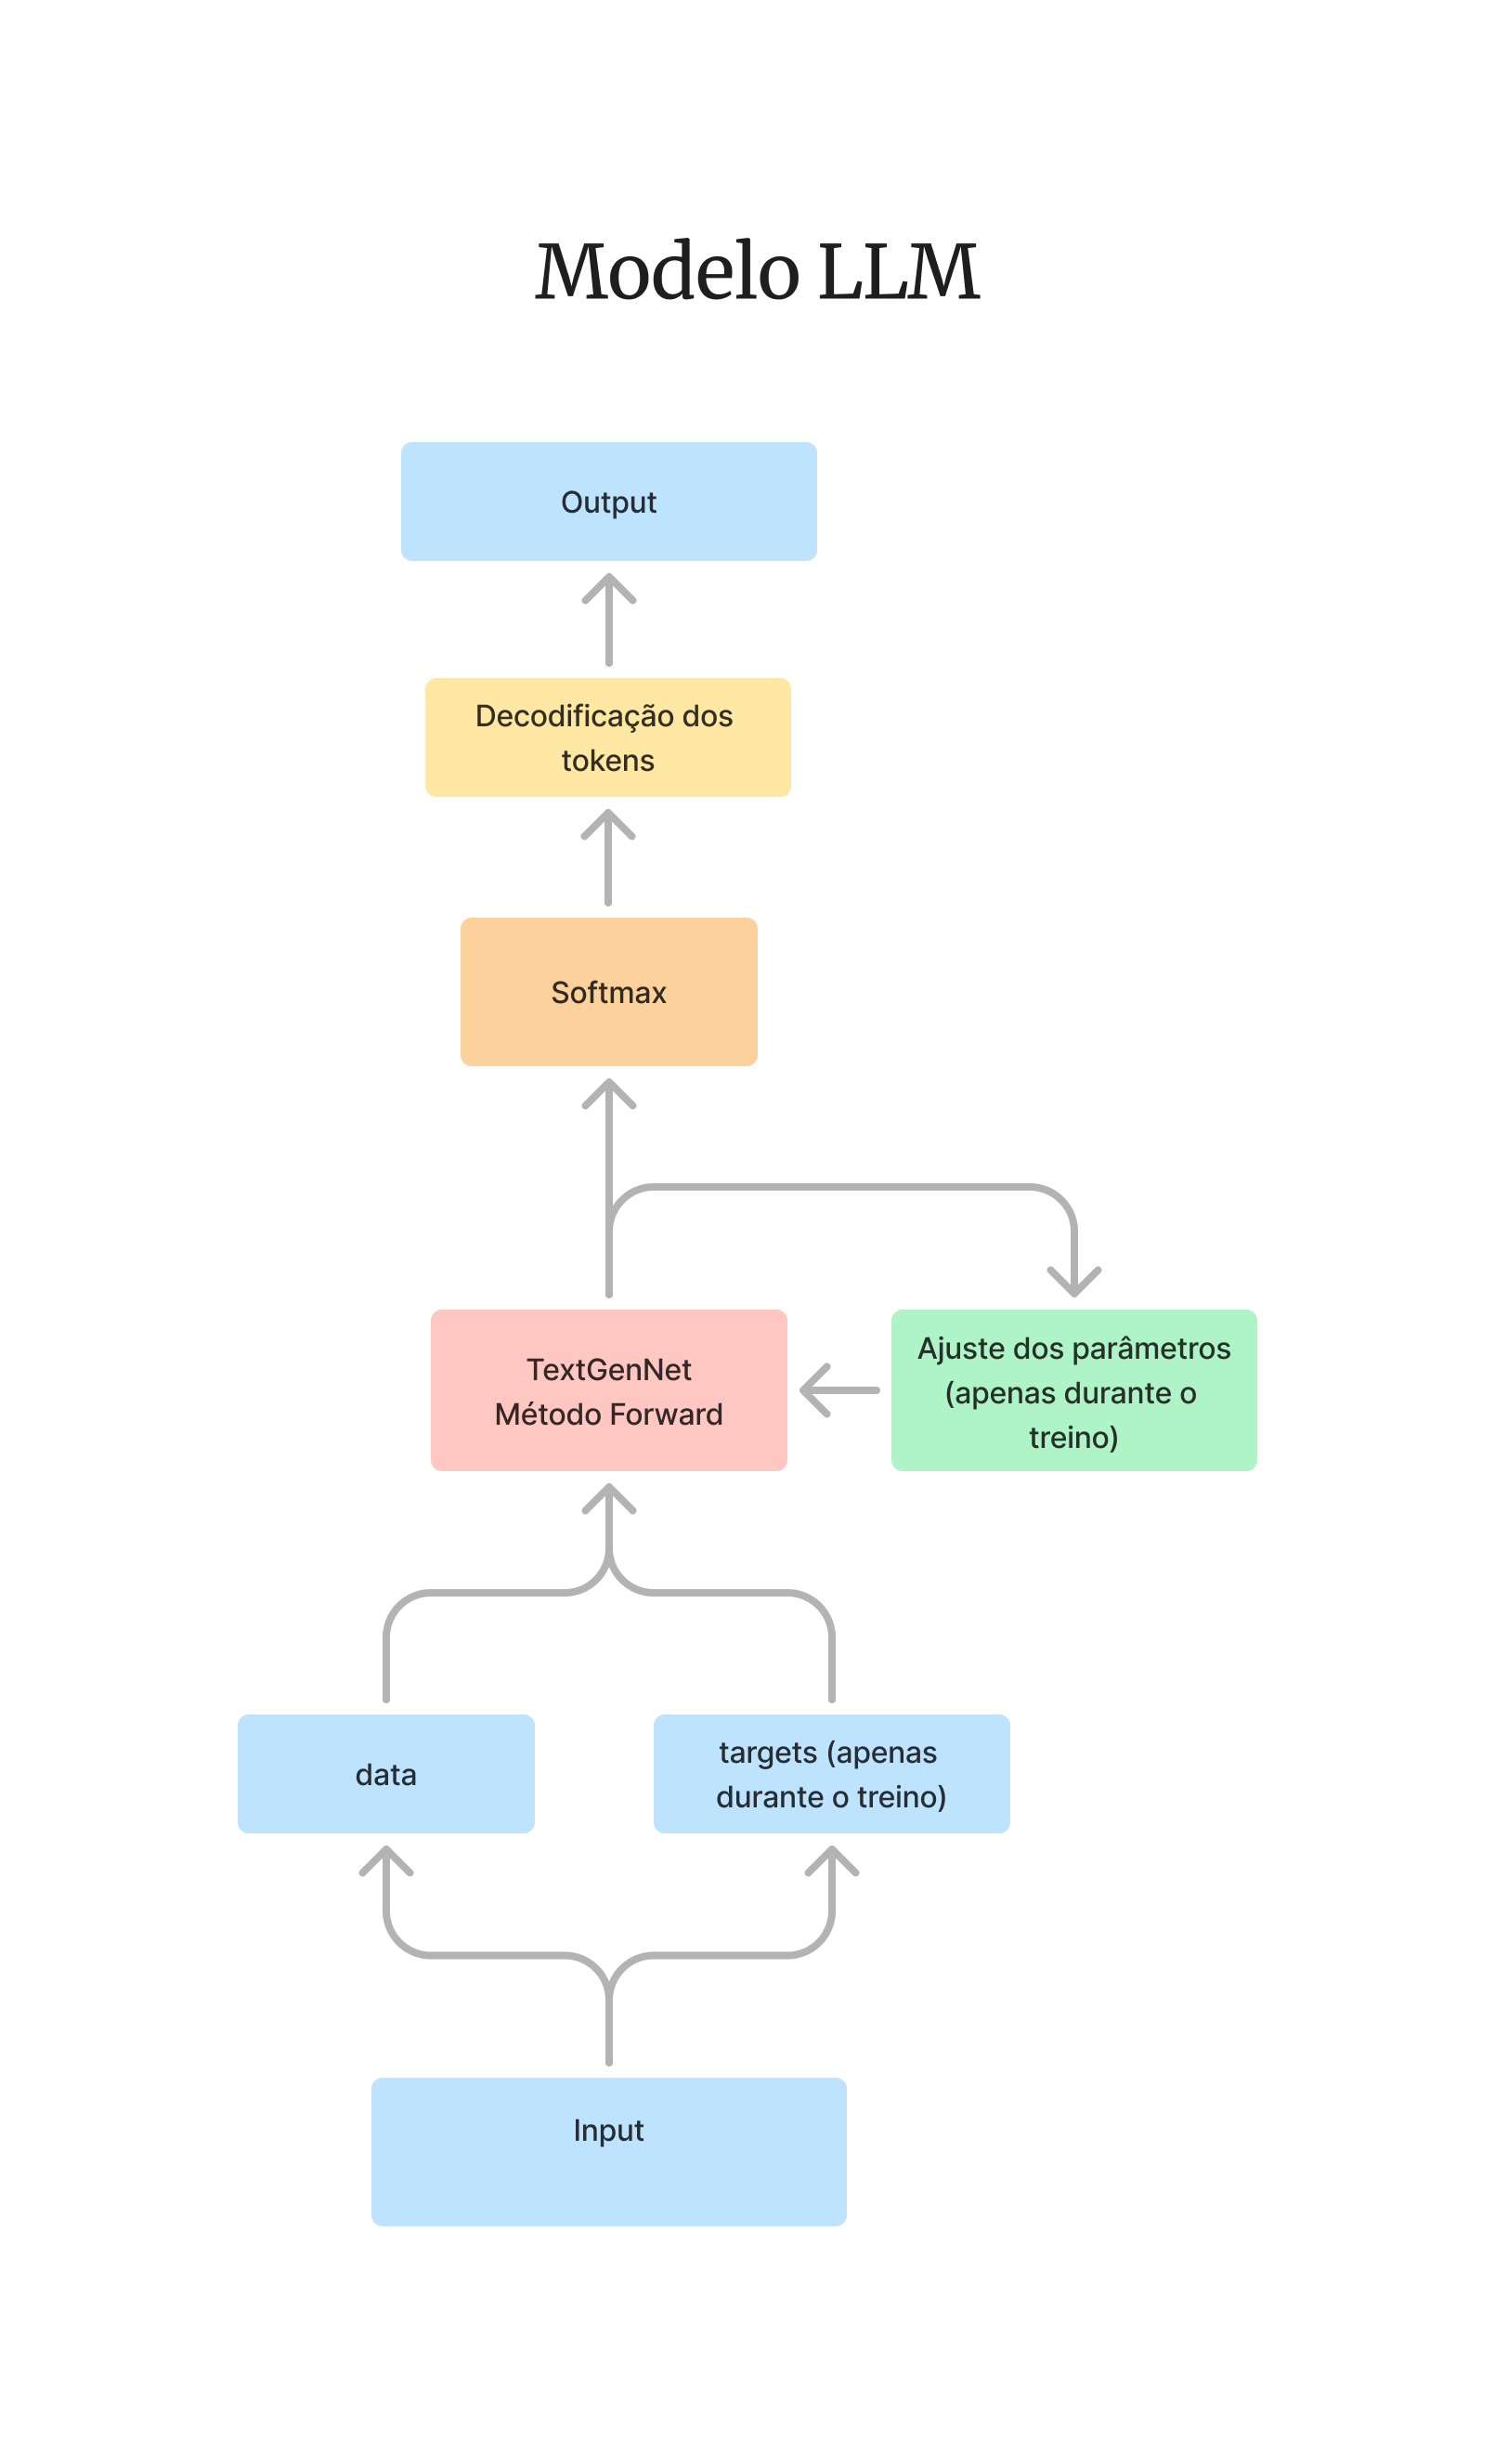

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/Diagrama.png" -O Diagrama.png
display(Image("Diagrama.png", width=500))

Figura 1 : Modelo TGN

A figura abaixo mostra o Diagrama do Método Forward da TGN. No diagrama anterior, foi exibida a entrada para essa rede como data/targets (no contexto de treinamento) ou apenas data (no contexto de teste). Considere essas entradas como tensores. Inicialmente, o método forward cria duas representações para esses tensores: uma representação semântica (word embeddings) e uma representação posicional. Essas representações são então somadas e encaminhadas para os blocos do modelo.

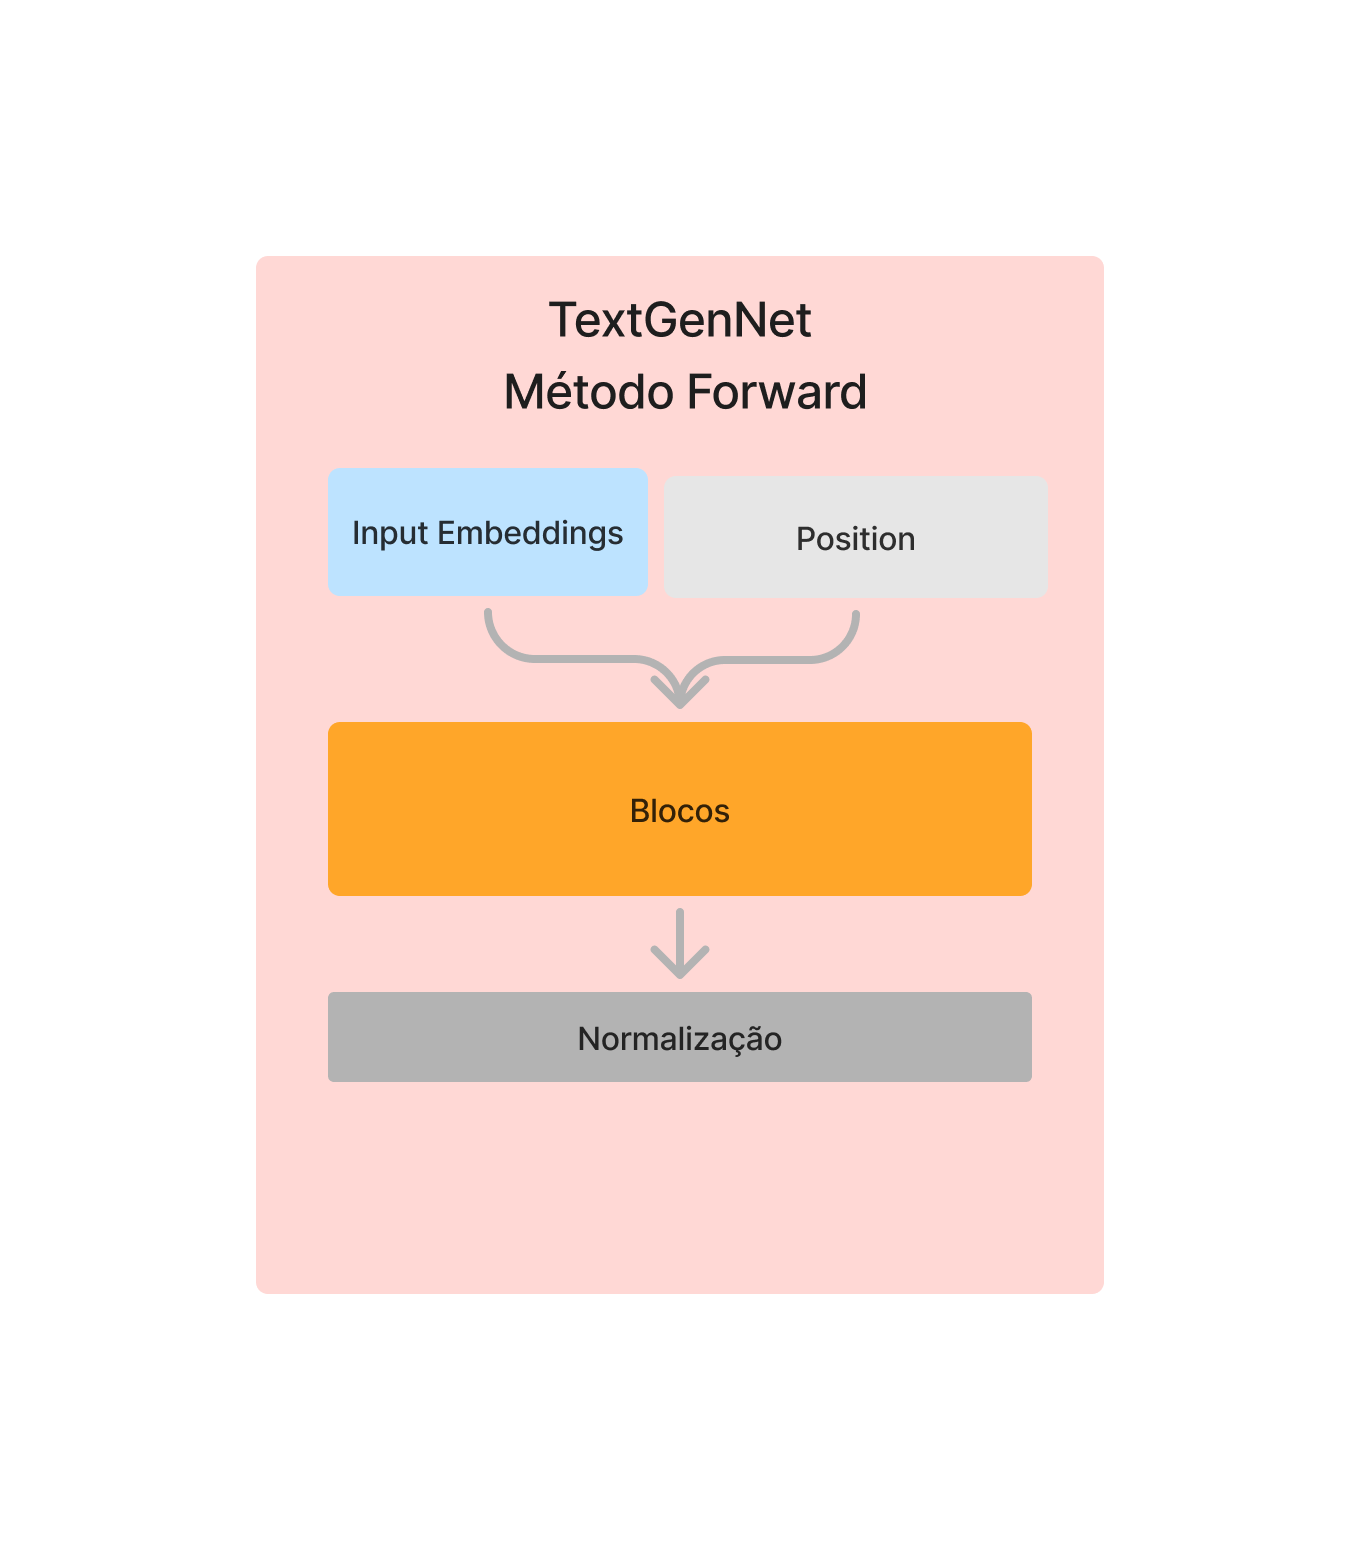

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/genNetForward.png" -O genNetForward.png
display(Image("genNetForward.png", width=400))

Figura 2 : Método Forward da TGN

Em cada bloco do modelo, a entrada, isto é, a soma da representação semântica e posicional, é normalizado e passa por uma Muti Head MaskedAttetion, para que sejam realizados os cálculos de atenção do modelo.

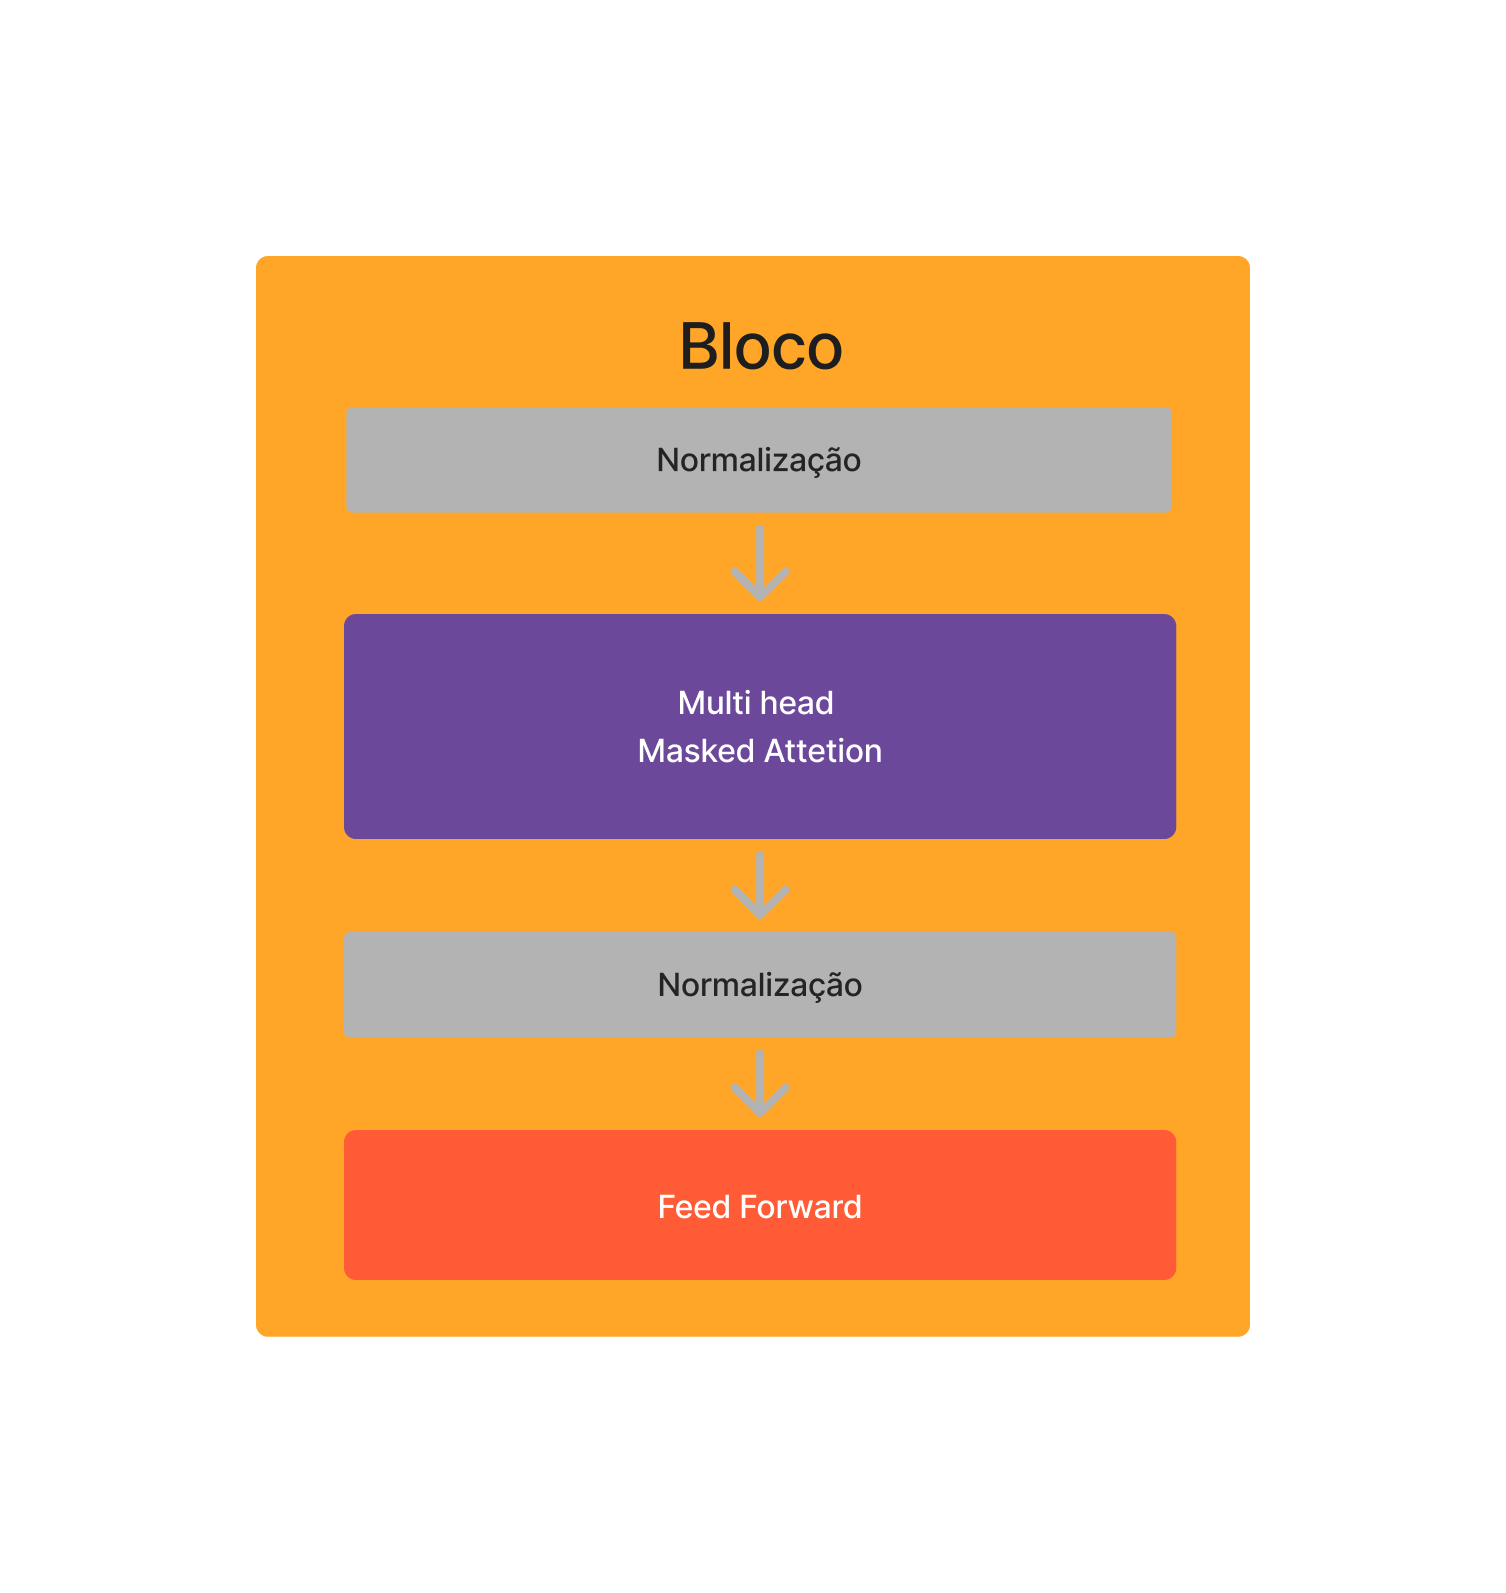

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/block.png" -O block.png
display(Image("block.png", width=450))

Figura 3: Bloco

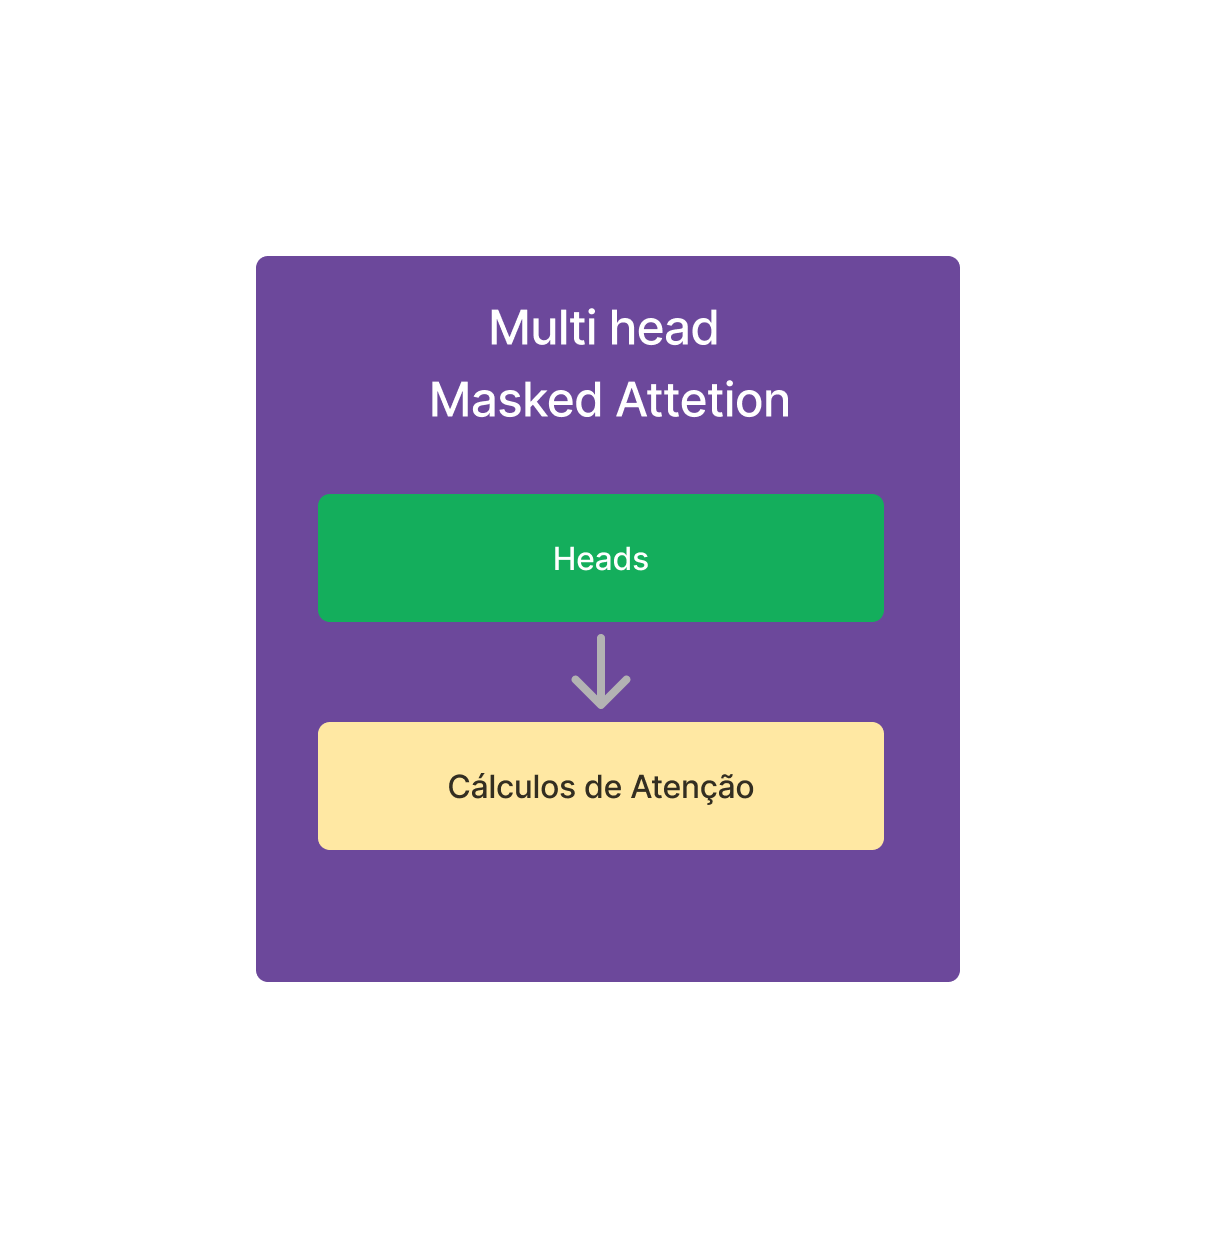

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/masked_attetion.png" -O masked_attetion.png
display(Image("masked_attetion.png", width=350))

Figura 4 : Máscara de Atenção

A Máscara de Atenção utiliza cabeças de atenção para projetar a entrada em três componentes: consultas (Query), chaves (Key) e valores (Value). Essas projeções são fundamentais para o cálculo de atenção. Antes de apresentar a fórmula desse cálculo, é importante entender o que são essas projeções.

Assim, para cada token da entrada, são realizadas três projeções distintas:

* **Query** : Representa o token sobre o qual se busca informações. É a consulta que está sendo feita.

* **Key** : É a representação de cada token na sequência, usada para comparar com a Query.

* **Value** : É o valor associado ao token que será retornado com base na relevância determinada pela comparação entre a Query e as Keys.


Assim, a Query atual é comparada com as Keys dos outros tokens para calcular um score de relevância. Esses scores determinam a importância de cada token para a consulta. Com base nesses scores, o valor (Value) correspondente a um token é selecionado.

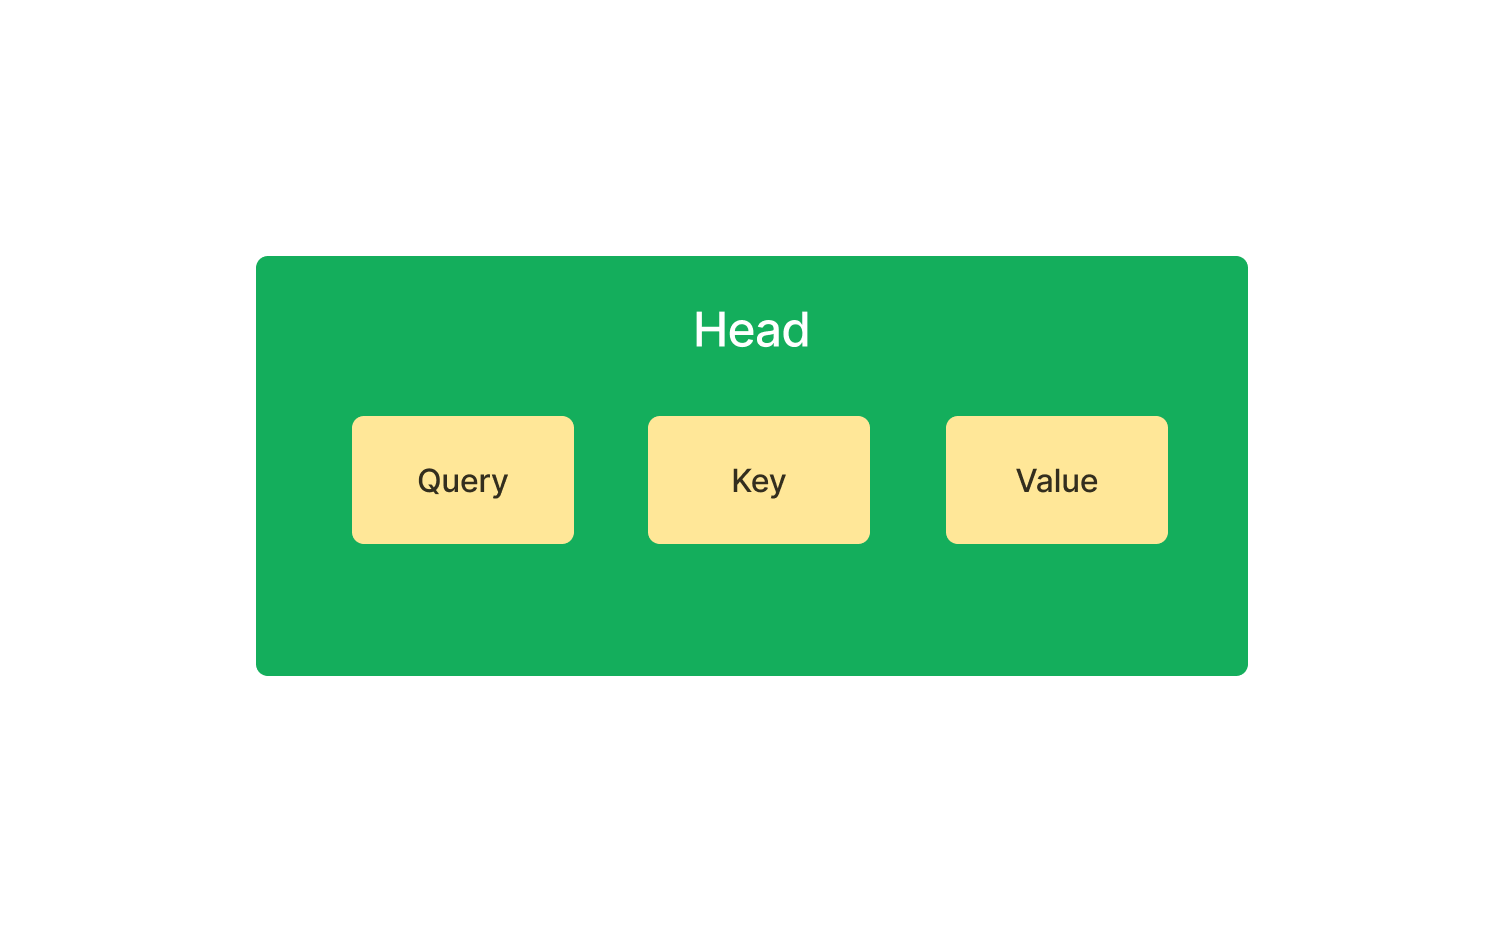

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/head.png" -O head.png
display(Image("head.png", width=400))

Figura 5: Cabeça de Atenção

A fórmula de atenção é dada por :

$$ Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V $$

Onde:

- $ Q $ representa a **Query** ;
- $ K $ representa a **Key** ;
- $ V $ representa o **Value** ;
- $ d_k $ é a dimensionalidade das chaves

Para capturar diferentes relações entre os tokens, modelos mais avançados utilizam múltiplas cabeças de atenção (multi-head attention). Cada cabeça de atenção calcula um conjunto distinto de pesos, permitindo que o modelo aprenda representações paralelas e complementares, como a estrututa gramatical da frase, a similaridade entre as palavras, entre outros. Dessa forma, ao final essas diferentes relações são associadas, melhorando o entendimento do modelo sobre a entrada. O GPT-3, por exemplo, possui uma arquitetura com 96 camadas, cada uma com 96 cabeças de atenção, demonstrando a importância desse mecanismo, como os próprios autores sintetiram na frase "Attention is all you need".

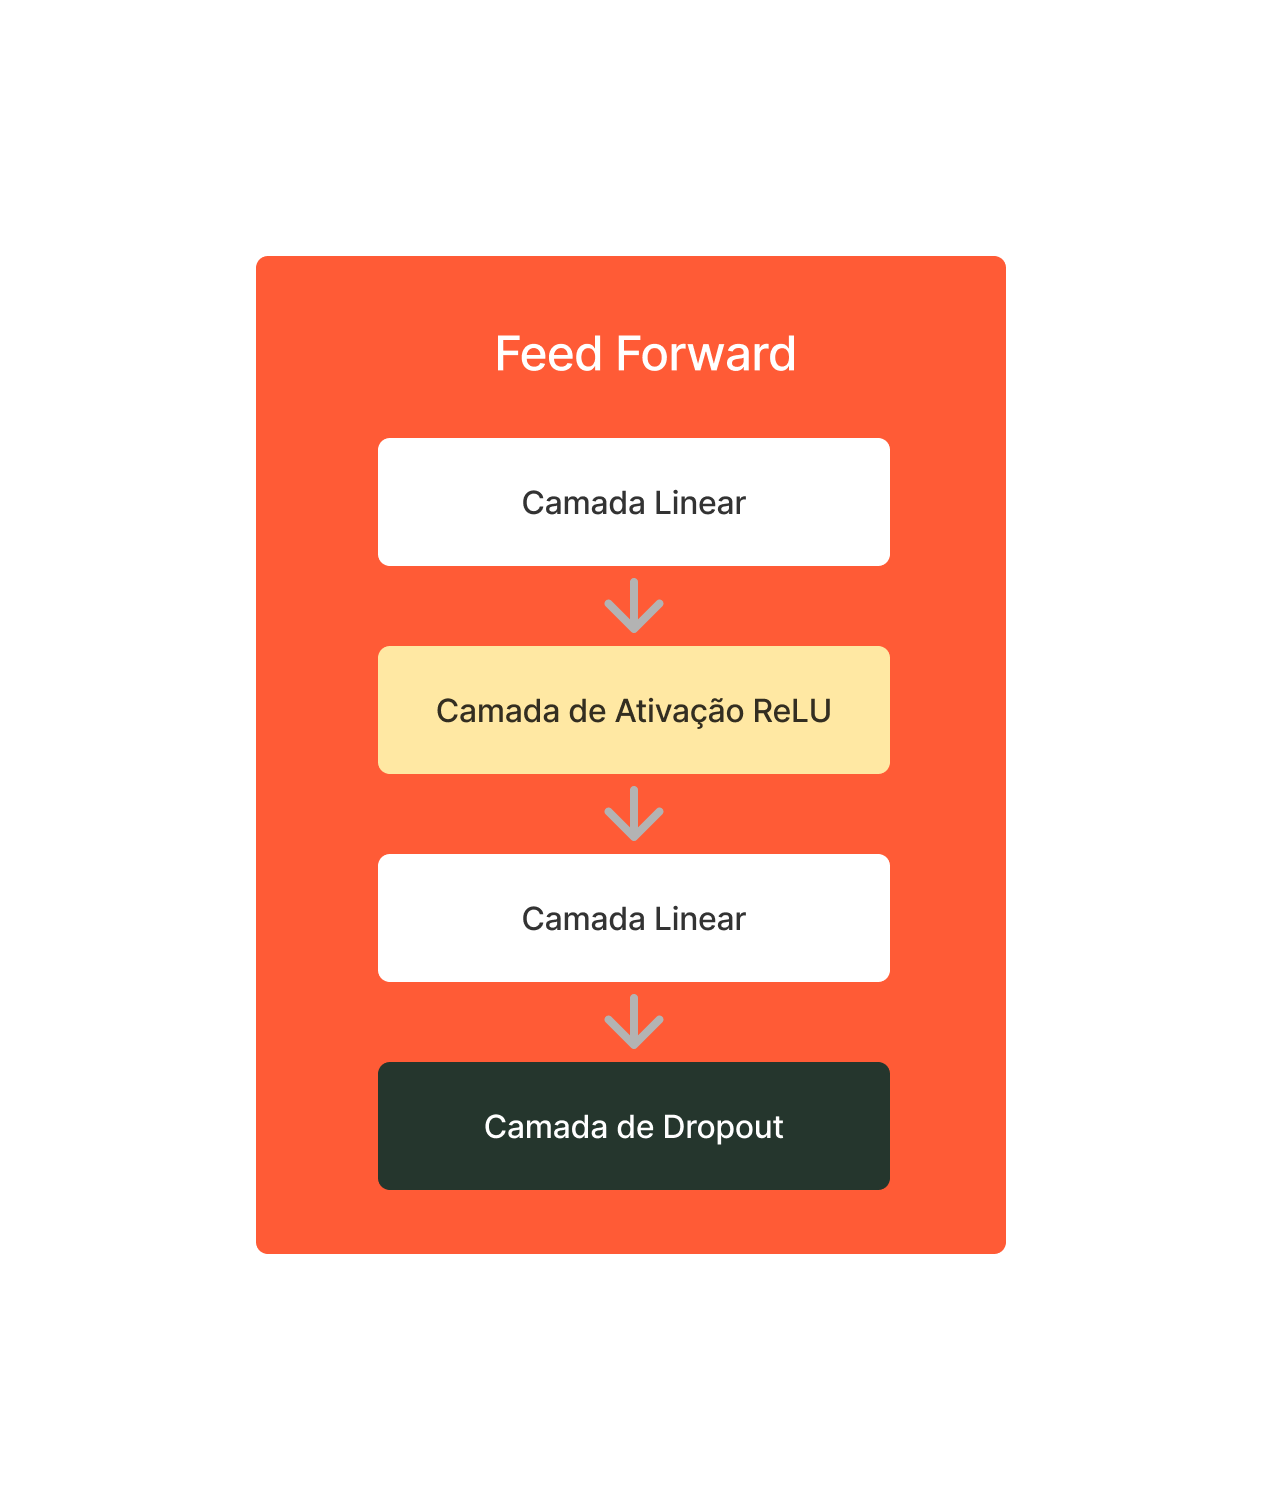

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/feedforward.png" -O feedforward.png
display(Image("feedforward.png", width=350))

Após a Máscara de Atenção, a saída é normalizada  e segue para uma Rede Feed Forward. Essa rede realiza os seguintes cálculos:


$$ ll1 = W1 \cdot x + b $$
$$ a1 = ReLU(ll1) $$
$$ ll2 = W2 \cdot  a1 + b $$
$$ out = dropout(ll2) $$

Onde :

* $ll1$ : representa a saída da primeira camada linear;
* $a1$ : representa a saída da função de ativação;
* $ll2$ : representa a saída da segunda camada linear;
* $b$ : representa o bias ;
* $W$ : representa a matriz dos pesos;
* $out$ : representa a saída da rede;


Foi utilizado a função de ativação ReLU, sendo que seu objetivo é introduzir não linearidade no modelo, buscando saídas mais criativas.




A saída da Rede Feed Forward são os logits e loss, quando o modelo está em modo de treino e apenas os logits, quando o modelo está em modo de teste. Assim, após essa rede, há uma bifurcação no fluxo.




No contexto de treinamento, é utilizado a Função de Entropia cruzada entre os logits preditos e os logits targets para calcular a perda. A fórmula da entropia cruzada é dada por:

$$
H(p, q) = - \sum_{i=1}^{N} p_i \log(q_i)
$$

Onde:

- $N$ é o número total de tokens no vocabulário;
- $p_i$ é a probabilidade real do token $i$ ;
- $q_i$ é a probabilidade predita pelo modelo para o token $i$ .


Após esse cálculo, a perda é retornada e é feito a retropropagação para calcular o gradiente da função de perda de forma que o otimizador Adam possa ajustar os pesos da rede. Esse processo é repetido iterativamente até atingir um determinado número de épocas. O otimizador Adam foi escolhido por ser bastante utilizado em modelos de geração de texto, mas é possível utilizar outros assim como também é possível calcular a perda de outras formas, por exemplo com o Erro Quadrático Médio.


No contexto de teste, os logits passam por uma Função de Softmax, para gerar um vetor de probabilidades do último token da sentença. Em seguida, é possível escolher qual ID será incorporado na sentença. Apesar de ser óbvio escolher o token de maior probabilidade, isso não costuma ser o mais comum , por isso será utilizado o método "torch.multinomial" para tentar obter saídas mais criativas.  Assim, o ID do token escolhido é armazendo em array e também é adicionada à sequência de entrada de forma a repetir o processo. Dessa forma, esse processo é repetido até gerar o número máximo de tokens definido nas configurações.


Após gerar a saída dos IDs dos tokens, é necessário decodificar esses IDs, sendo chamado o método de "decode_tokens". Desse modo, utiliza-se o dicionário de decodificação para capturar os tokens correspondentes aos IDs gerados de modo a obter a saída em linguagem natural. Assim sendo, essas foram as etapas para o modelo criado. Para entender como foi o treino e os testes do modelo, observe os diagramas abaixo.

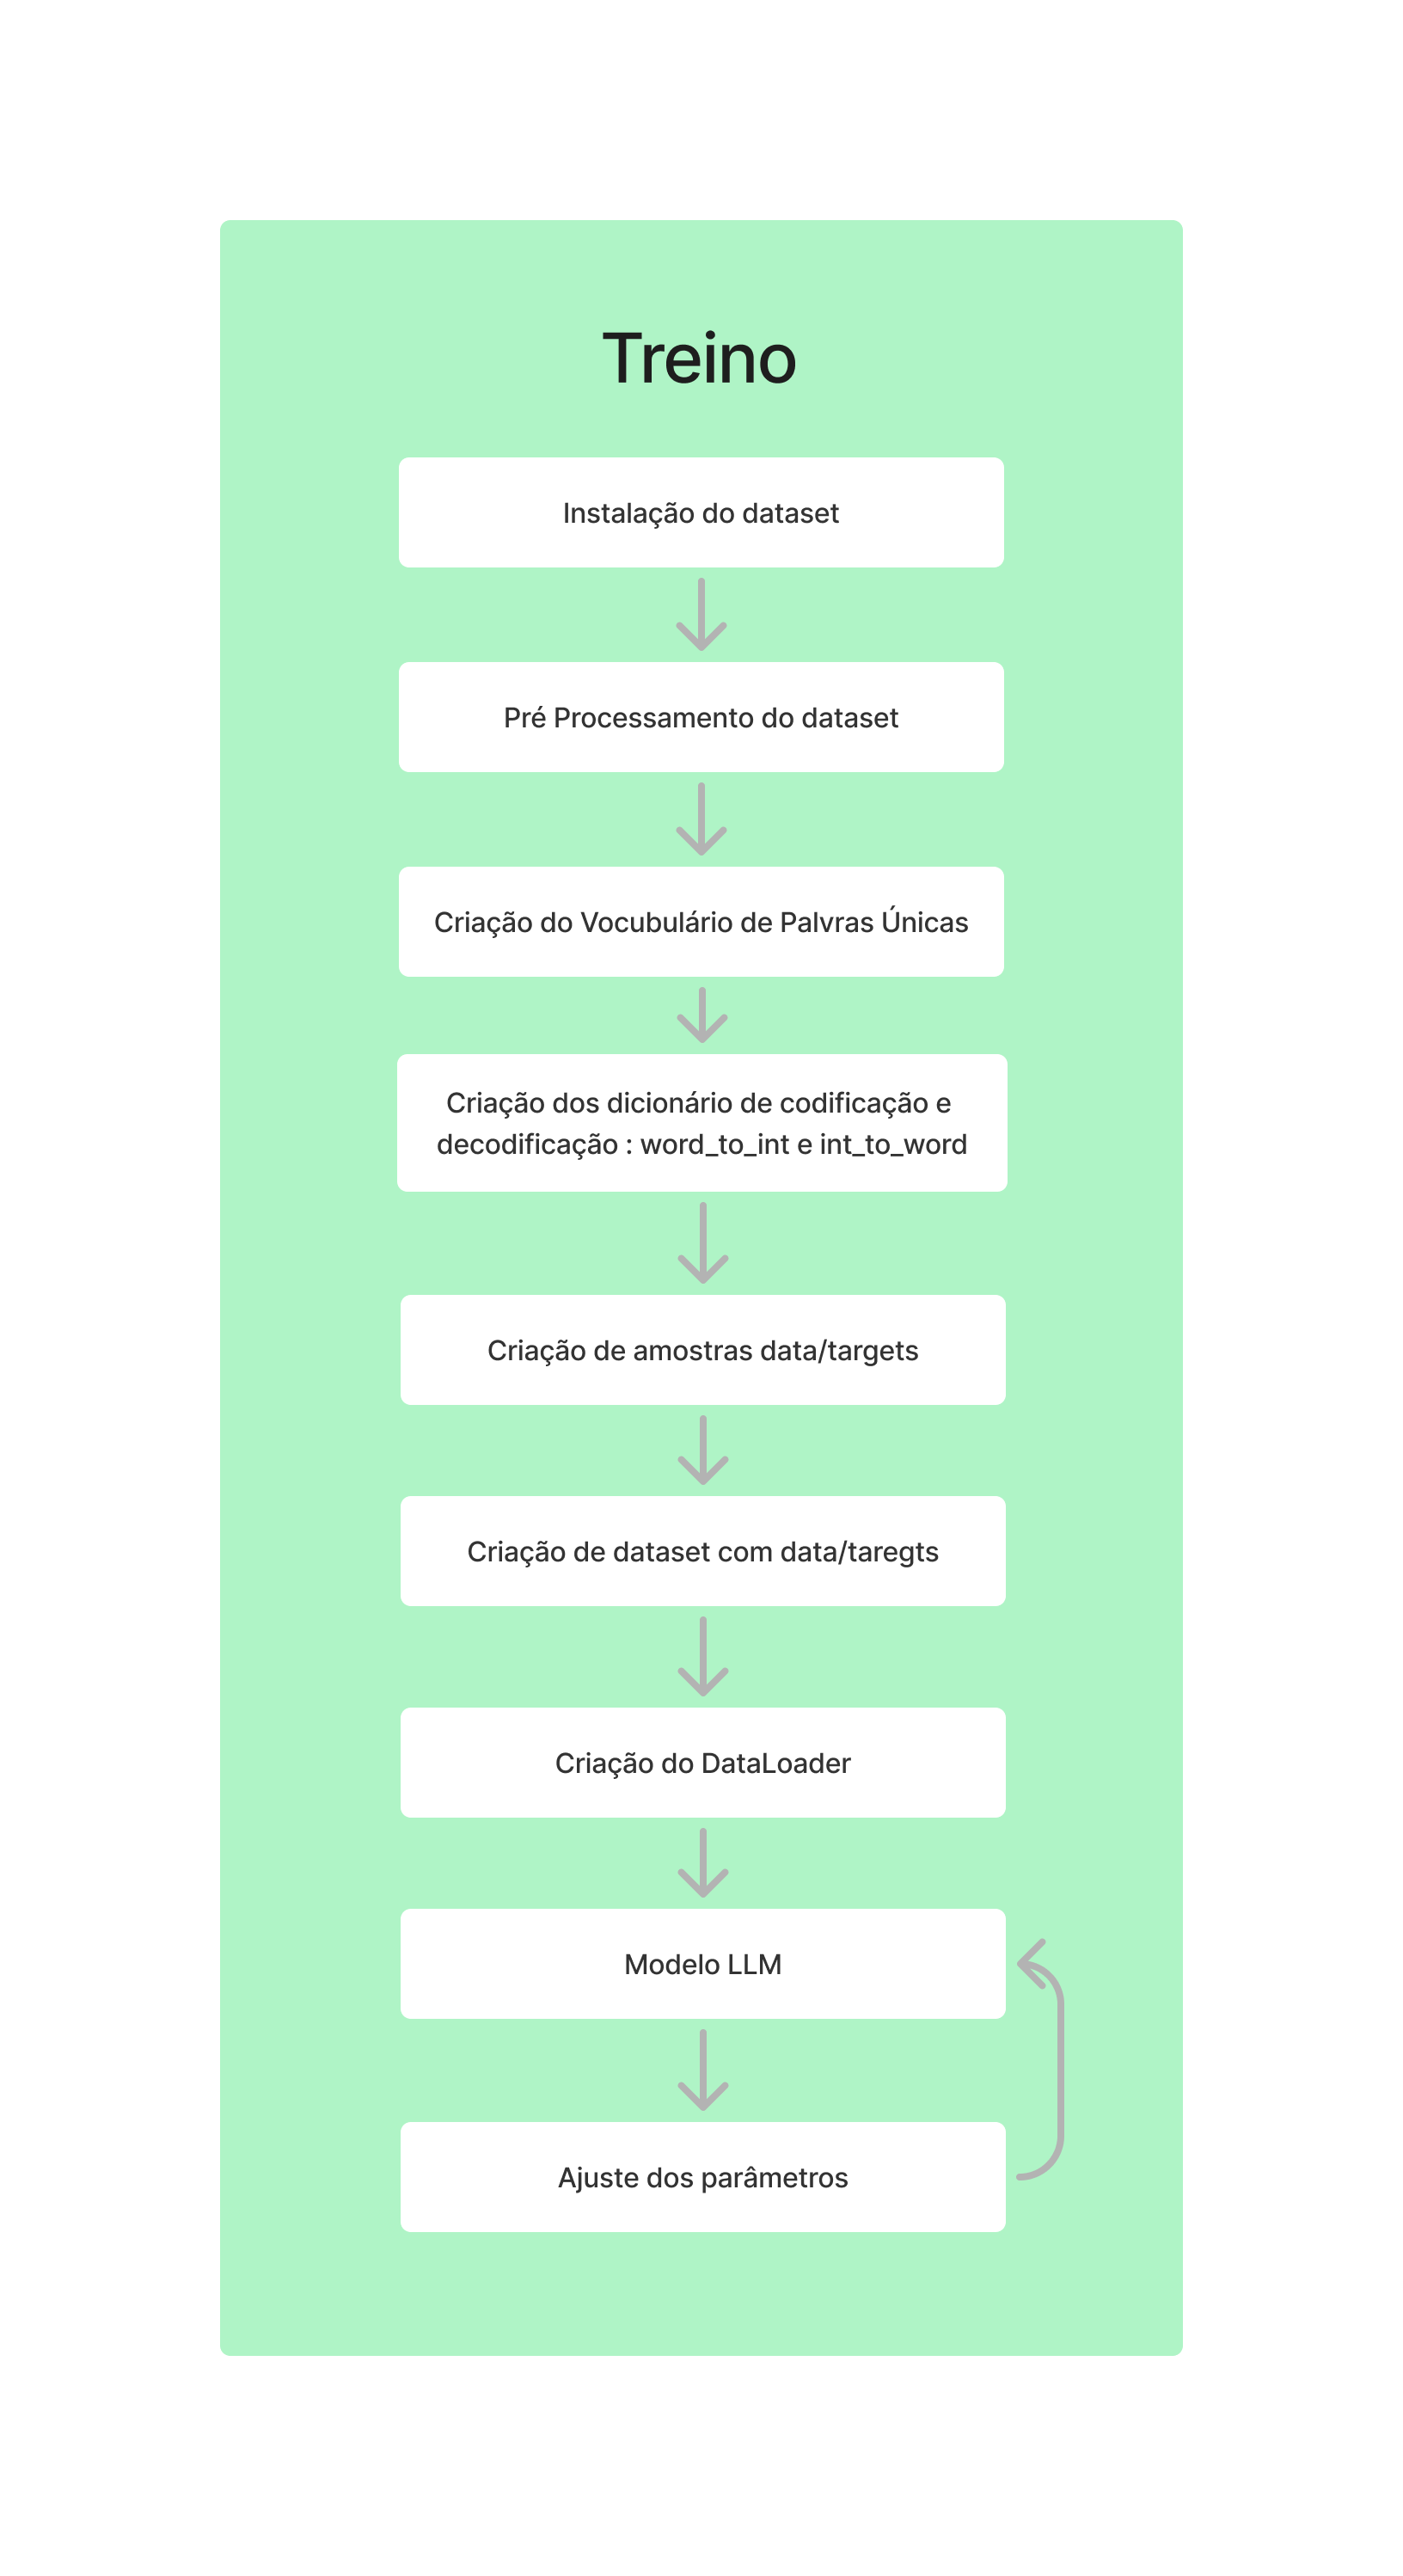

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/treino.png" -O treino.png
display(Image("treino.png", width=450))

Para realizar o treinamento, é preciso de um dataset textual. Assim, é feito sua instalação e o pré processamento.  Em seguida, é necessário criar amostras data/targets para o dataset que inicialmente é apenas um texo corrido. Essas amostram data/targets serão tensores. Desse modo, é preciso primeiro criar um dicionário de codificação/decoficação das palavras do vocubulário e para isso, é preciso criar um vetor de palavras único do texto. Dessa forma, após criar o vetor de palavras e os dicionários, é possível criar as amostrar e transformá-las em tensores, criando um dataset com data/targts. Além disso, foi um criado um DataLoader para criar mini lotes para o treinamento, sendo esses lotes com os tensores data/targets da entrada do modelo.



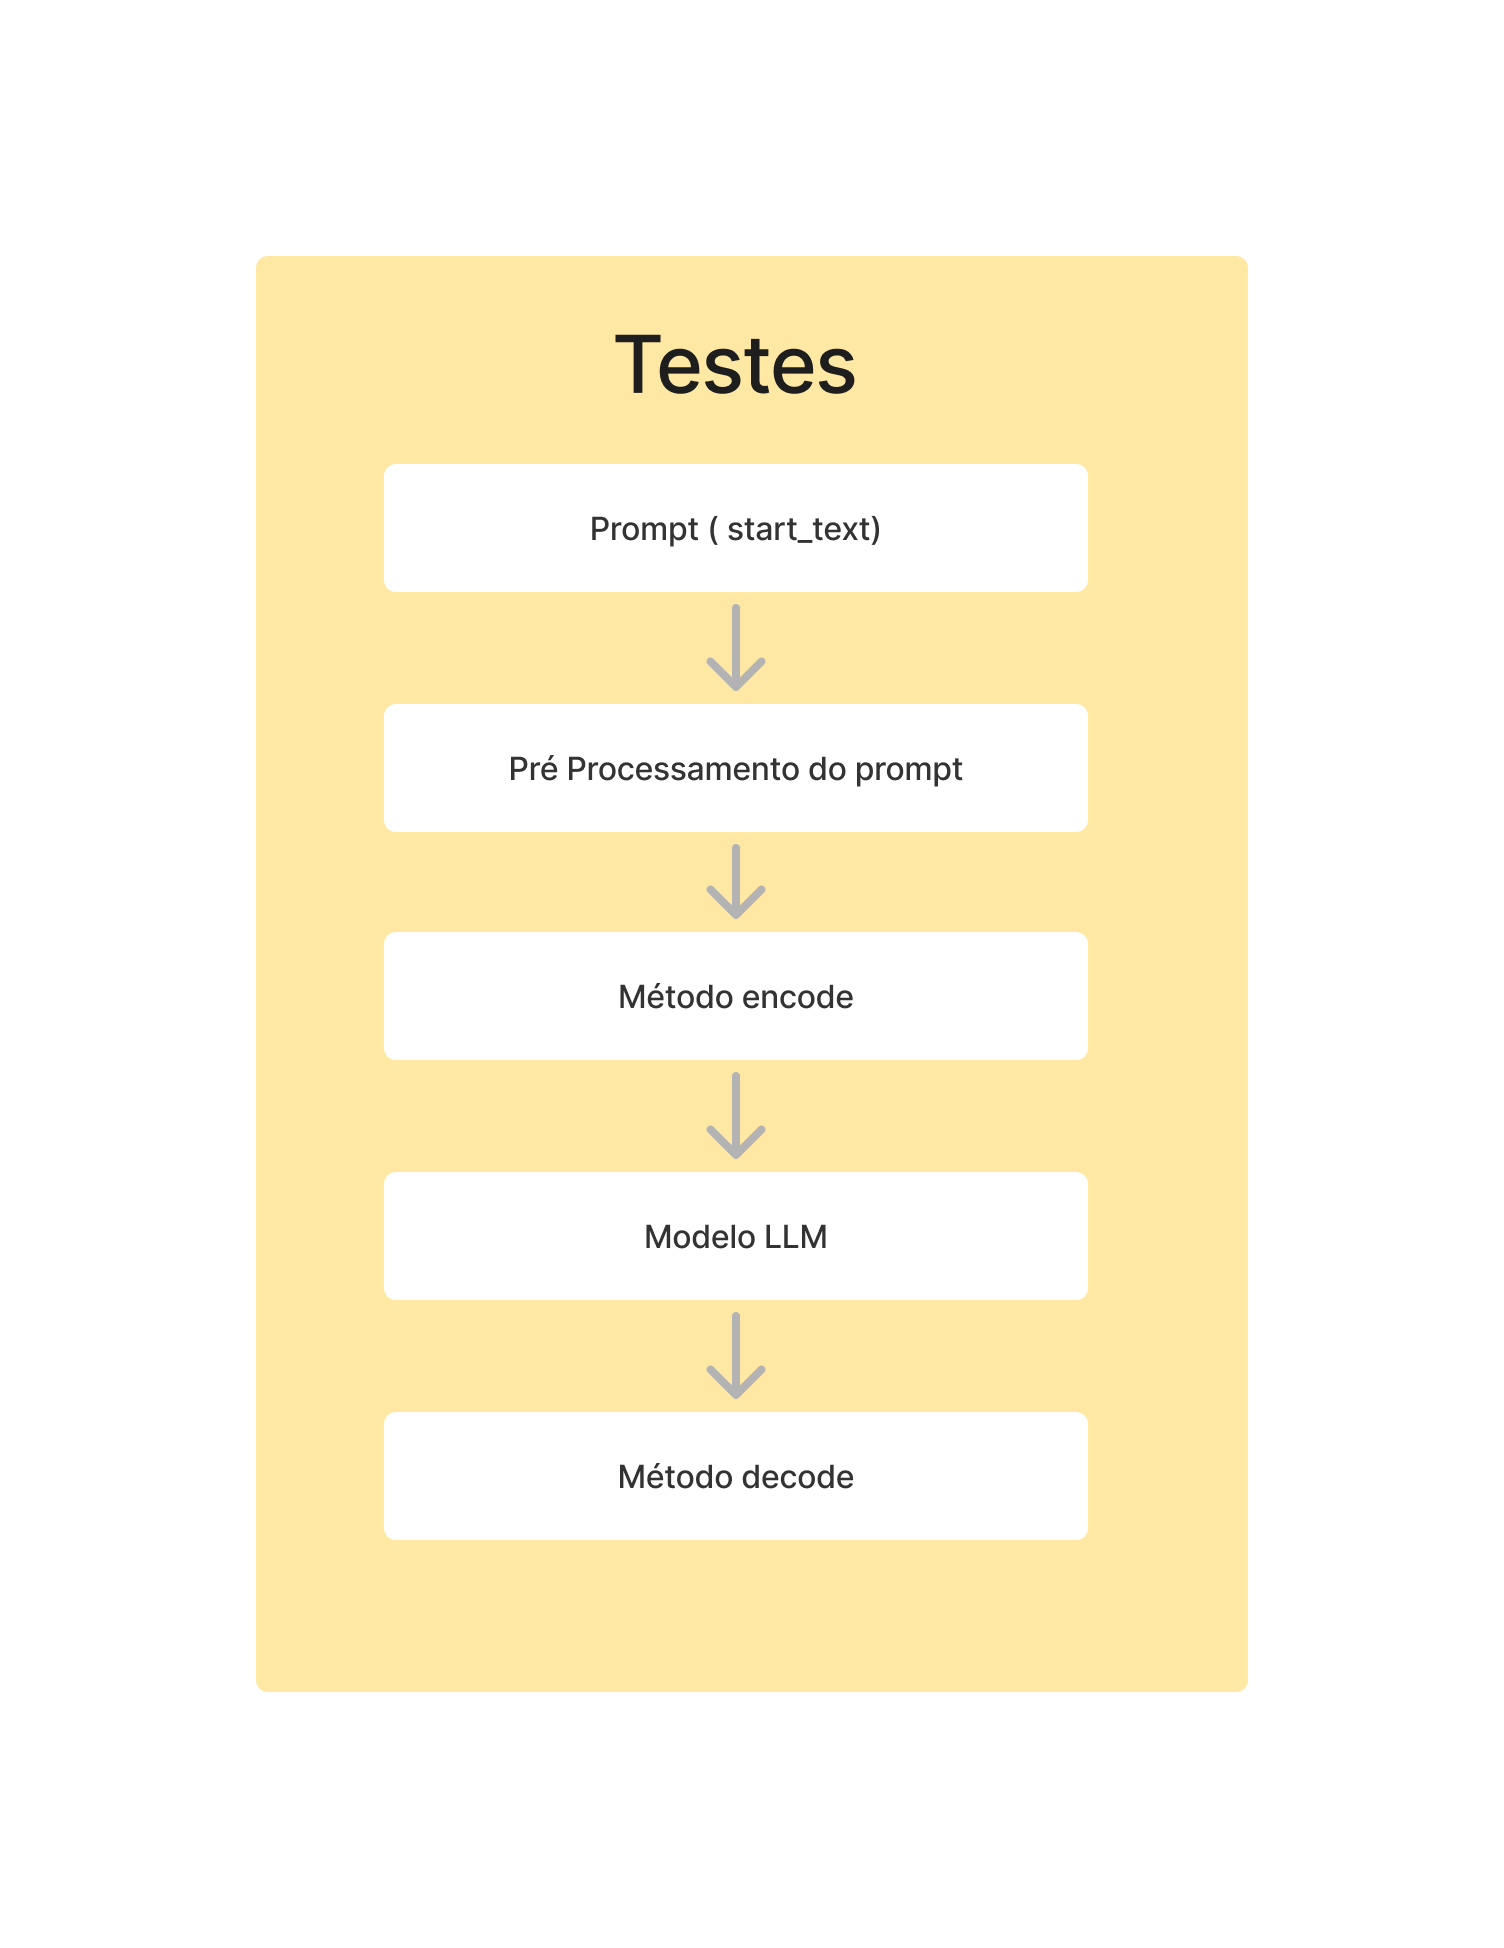

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/llm/teste.png" -O teste.png
display(Image("teste.png", width=400))

Já para o caso dos Testes, o processamento inicial da sequência de entrada é mais simples, basta realizar o pré processamento e fazer a codificação da entrada pra IDs e posteriormente para tensores. Assim, na saída no modelo, os dados são decodificados para os tokens correspondentes em linguagem natural.


É importante ressaltar que existem diversas arquiteturas para os modelos grandes linguagem. Como são uma tecnologia relativamente recente, ainda há muitas pesquisas em andamento para aprimorar esses modelos e melhorar a qualidade de suas saídas. Essas pesquisas são realizadas por diferentes empresas e organizações. Além disso, o processo de treinamento desses modelos é altamente complexo, demandando o uso de bases de dados massivas e grande poder computacional para gerar saídas que realmente auxiliem os seres humanos em suas tarefas.

## Código

Na seção de Fundamentação Teórica, foram apresentados diversos diagramas para explicar o funcionamento de um modelo LLM. Como esses modelos costumam ser de difícil entendimento, optou-se por uma explicação focada no fluxo dos dados e nos principais cálculos realizados. No entanto, os códigos a seguir trarão explicações mais detalhadas sobre o funcionamento interno, sendo, portanto, essencial que sejam lidos em conjunto com os diagramas para uma melhor compreensão.

O código a seguir realiza a instalação e importação das bibliotecas que foram utilizadas para o desenvolvimento do modelo. A principal biblioteca utilizada é o PyTorch, que fornece os módulos essenciais para redes neurais e otimização, através dos pacotes torch.nn e torch.optim, respectivamente. O otimizador importado é o Adam.

Para realizar os cálculos de atenção, são importadas as bibliotecas math e functional. Também são importadas as bibliotecas Dataset e DataLoader para a criação e manipulação de datasets e mini-lotes durante o treinamento. Além disso, a biblioteca nltk é utilizada para o pré processamento de dados, com nltk incluindo o método word_tokenize para tokenização. A biblioteca unidecode é utilizada para a remoção de acentos.


Vale ressaltar que é possível criar um modelo LLM com outras bibliotecas, por exemplo, a Keras. A escolha da biblioteca Torch foi devido a maior familiaridade com a mesma.

In [ ]:
!pip install transformers torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import nltk
from nltk.tokenize import word_tokenize
!pip install unidecode
import unidecode
nltk.download('punkt')

import torch.nn.functional as F
from torch.optim import Adam
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Máscara de Atenção

A classe abaixo define uma cabeça de atenção, de forma a realizar as projeções lineares dos valores de entrada para obter as chaves (key), consultas (query) e valores (value). Optou-se por realizar os cálculos de atenção na classe seguinte.

In [ ]:
class Head(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.query = nn.Linear(config.d_model, config.head_dim, bias=config.bias)
    self.key = nn.Linear(config.d_model, config.head_dim, bias=config.bias)
    self.value = nn.Linear(config.d_model, config.head_dim, bias=config.bias)


  def forward(self, x):
    q = self.query(x)
    k = self.key(x)
    v = self.value(x)
    return q, k, v


A classe abaixo realiza o mecanismo de auto atenção, que é essencial em modelos baseados em Transformers.

Na inicialização, a classe define o número de cabeças de atenção, a dimensão de cada cabeça e a dimensão do modelo. A dimensão de cada cabeça é escolhida de forma que a soma das dimensões de todas as cabeças seja igual à dimensão do modelo. Também é definido uma camada de dropout, uma camada de saída e as cabeças de atenção.

Em seguida, é criado um método de forward, que itera sobre cada cabeça para realizar os cálculos de atenção. Assim, a fórmula de atenção "Scaled dot-product attention" é aplicada e os resultados são concatenados. Por fim, esses resultados passam pela camada linear de saída e são retornados.

In [ ]:
class MaskedSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.num_heads = config.num_heads
        self.head_dim = config.head_dim
        self.dropout = nn.Dropout(config.dropout)
        self.d_model = config.d_model
        self.heads = nn.ModuleList([Head(config) for _ in range(config.num_heads)])
        self.output_linear = nn.Linear(config.d_model, config.d_model)
        assert self.head_dim * self.num_heads == self.d_model, "d_model must be divisible by num_heads"


    def forward(self, x, mask=None):
        # B, T, C = x.size()

        heads_output = []
        for head in self.heads:
            k, q, v = head(x)

            # Scaled dot-product attention
            scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)

            if mask is not None:
                scores = scores.masked_fill(mask == 0, float('-inf'))

            attn_weights = F.softmax(scores, dim=-1)
            attn_weights = self.dropout(attn_weights)

            head_output = torch.matmul(attn_weights, v)
            heads_output.append(head_output)


        concatenated_output = torch.cat(heads_output, dim=-1)
        output = self.output_linear(concatenated_output)

        return output




### Rede Neural Feed Forward - Multilayer Perceptron (MLP)

O código abaixo implementa a Rede Feed-Forward. A arquitetura inclui uma camada de ativação, uma camada de dropout e duas camadas lineares. Inicialmente, a entrada é processada pela primeira camada linear, seguida pela aplicação da função de ativação. Em seguida, a saída da camada de ativação passa pela camada de dropout para regularização e finalmente, a rede aplica a segunda camada linear, produzindo a saída final do modelo.

Foi escolhida a função de ativação ReLU, mas poderia escolher-se outras como GeLU. O bias para o cálculo da transformação matricial é definido como parâmetro e também é definido um aumento de dimensinalidade nos dados para tentar captar melhor a complexidade dos dados. Na última camada linear, é feito a redução da dimensionalidade.

In [ ]:
class FeedFoward(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.linear1 = nn.Linear(config.d_model, 4 * config.d_model, bias=config.bias)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(config.d_model * 4,  config.d_model, bias=config.bias)
    self.dropout = nn.Dropout(config.dropout)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.dropout(x)
    return x



### Normalização

A classe abaixo é responsável pela normalização do modelo. Assim, são definidas duas camadas de normalização com o intuito de estabilizar o modelo e melhorar o treinamento.

In [ ]:
class LayerNorm(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.norm1 = nn.LayerNorm(config.d_model, config.bias)
    # self.norm2 = nn.LayerNorm(config.d_model, config.bias)

  def forward(self, x):
    x = self.norm1(x)
    # x = self.norm2(x)
    return x

### Bloco

A classe Block define um bloco básico de um modelo LLM, que integra a normalização, a atenção e uma Rede Feed-Forward (MLP).

Assim, no método forward, a entrada é primeiro normalizada, depois processada pela camada de atenção e somada à entrada original para formar uma conexão residual. Em seguida, o resultado é novamente normalizado e passado pela Rede Feed-Forward, que também é adicionada à saída anterior, com o intuito de aumentar a eficácia do modelo.

In [ ]:
class Block(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.ln_1 = LayerNorm(config)
    self.masked_self_attention = MaskedSelfAttention(config)
    self.ln_2 = LayerNorm(config)
    self.feed_forward = FeedFoward(config)

  def forward(self, x):
    x = self.ln_1(x)
    x = x + self.masked_self_attention(x)
    x = self.ln_2(x)
    x = x + self.feed_forward(x)
    return x



### Text Generator Network (Rede de Geração de Texto)



O código abaixo agrega os componentes criados anteriormente e adiciona os restantes para o funcionamento do modelo TGN.

Na inicialização da classe, o parâmetro config define as configurações do modelo. São criados os blocos de Transformer, a camada de normalização LayerNorm, bem como as camadas de embeddings de tokens e de posição, uma camada de dropout e uma camada linear final.

Em seguida são criados dois métodos, o "forward" e o "generate". O método "forward" define o fluxo de dados pela rede, sendo seus parâmetros os input_ids e opcionalmente os targets. O parâmetro targets foi definido como optional (targets=None), para o caso do teste do modelo, no qual os targets não são necessários. Os input_ids correspondem as palavras, que quando chegam nesse ponto do código já estão em formato de tensores PyTorch.

Em seguida, é definido uma variável de device que recebe o mesmo device de onde estão os tensores de entrada (palavras => tokens => input_ids => tensor) . Isso é feito para garantir que os cálculos ocorram no mesmo dispostivo.

As variáveis B e T armazenam o tamanho do batch e o comprimento da sequência, respectivamente. Após isso, o tensor de entrada passa pela camada de embeddings, de forma que cada token passa a ter uma representação vetorial de dimensão d_model.  A camada de embeddings posicional é usada para incorporar a ordem dos tokens na sequência, sendo utilizado o comprimento da sequência (T) como parâmetro para gerar a incorporação posicional. As representações vetoriais dos tokens e suas posições são somadas (tok_emb + pos_emb) para gerar a entrada final x. Essa soma combina o significado semântico dos tokens com sua posição na sequência, o que permite ao modelo aprender tanto o contexto quanto a ordem relativa dos tokens.  Após isso, a soma (tok_emb + pos_emb) passa por uma camada de dropout para reduzir a chance de overting. Foi utilizado o método de embedding para realizar a transformação posicional, por não haver um método pronto no torch.


Após a camanda de dropout, os dados passam pelos blocos que foram explicados anteriormente. Assim, os dados passam por n_layer blocos. Em seguida, os dados passam pela camada de normalização e pela camada linear final, a qual produz os logits, que são os valores brutos da classificação gerada.

Para o contexto de treinamento, é adicionado algumas linhas abaixo para realizar o o cálculo da perda (loss) por meio entropia cruzada, sendo que a loss calculada será utilizada para ajustar os parâmetros do modelo durante a otimização.  Para realizar o cálculo da loss, são comparados os logits preditos na classificação (shifits_logits) e os logits reais(shift_targets). Antes de fazer a comparação, é necessário ajustar os tensores. É preciso remover a última posição dos shift_logits e a primeira posição dos shift_targets. Isso ocorre porque o primeiro token de shift_targets não tem um token anterior para ser previsto, e o último logit de shift_logits não precisa prever nada, já que não há tokens após ele. Dessa forma, as previsões são alinhadas com os targets corretos para calcular a loss.

Dessa forma, no modo de treinamento, as saídas são os logits e a loss. Para o contexto de teste, há também o método "generate". Esse método realiza um loop com o número máximo de tokens a serem gerados, chamando o método de "forward" em cada iteração. É criado um array de output_ids para armazenar os outputs do método de forward , os quais serão apenas os logits, pois no modo teste não há targets e portanto não há como calcular a loss. Uma vez que os outputs do método forward são os logits , é preciso passar esses logits por uma função de softmax de forma a gerar um vetor de probabilidades do próximo token da sentença, utilizando o método "torch.multinomial" para fazer a escolha, sendo o token escolhido armazenado no array output_ids. Em seguida, o token gerado é concatenado à sentença de entrada formando um novo input_ids e assim o loop continua até o máximo de número de tokens ser atingido. Por fim, o array de output_ids é retornado e precisará passar pelo método de "decode" para ser interpreta em linguagem natural.

In [ ]:
class TextGenNet(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.word_token_embedding = nn.Embedding(config.vocab_size, config.d_model)
        self.position_embedding = nn.Embedding(config.max_length, config.d_model)
        self.dropout = nn.Dropout(config.dropout)
        self.blocks = nn.Sequential(*[Block(config) for _ in range(config.n_layer)])
        self.ln = LayerNorm(config)
        self.ll = nn.Linear(config.d_model, config.vocab_size, bias=False)

    def forward(self, input_ids, targets=None):
        device = input_ids.device
        B, T = input_ids.size()

        # Positional e token embed
        tok_emb = self.word_token_embedding(input_ids)
        pos_emb = self.position_embedding(torch.arange(T, device=device))
        x = self.dropout(tok_emb + pos_emb)

        # Transformer blocks
        x = self.blocks(x)

        # Norm layer
        x = self.ln(x)

        # Final layer
        logits = self.ll(x)

        if targets is not None:
            shift_logits = logits[:, :-1, :].contiguous()
            shift_targets = targets[:, 1:].contiguous()
            loss = F.cross_entropy(shift_logits.view(-1, shift_logits.size(-1)), shift_targets.view(-1))
            return logits, loss

        return logits, None


    def generate(self, input_ids, max_new_tokens):
      output_ids = []

      for i in range(0, max_new_tokens):
          # print(f"\n=== Token {i + 1} ===")
          input_ids_cond = input_ids[:, -self.config.block_size:]
          logits, _ = self.forward(input_ids_cond)
          logits = logits[:, -1, :]
          # print(f"Logits (raw scores): {logits}")
          probs = F.softmax(logits, dim=-1)
          # print(f"Probs: {probs}")
          input_ids_next = torch.multinomial(probs, num_samples=1)
          # print(f"Next token (input_ids_next): {input_ids_next.item()}")
          output_ids.append(input_ids_next)
          input_ids = torch.cat((input_ids, input_ids_next), dim=1)

      output_ids = torch.cat(output_ids, dim=1)
      # print(f"Generated tokens: {output_ids}")
      return output_ids

### Configurações do modelo

O código abaixo define os parâmetros gerais para o treinamento do modelo LLM. Assim, são definidos o dispositivo que será utilizado, o número máximo de tokens a serem gerados, o número de épocas de treinamento, a taxa de aprendizado do otimizador do modelo (será utilizado o otimizador Adam), o tamanho dos lotes de treinamento e o tamanho da sequência de entrada do modelo.



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
max_new_tokens = 50
epochs = 100
learning_rate = 0.001
batch_size = 8
SEQUENCE_LENGTH = 64

O código abaixo define os parâmetros que definem a arquitetura do modelo. Assim, são definidos o número de cabeças para os cálculos de atenção, a dimensão do modelo, a dimensão de cada cabeça de atenção, a taxa de dropout para evitar overfitting, a presença ou não de bias, o tamanho do vocabulário, o tamanho máximo da sequência de entrada, o número de camadas do modelo, isto é, quantos blocos o modelo terá, e o tamanho do bloco de entrada.

In [ ]:
class Config:
    num_heads = 2
    d_model = 64
    head_dim = 32
    dropout = 0.1
    bias = True
    vocab_size = 50257      # Len tokenizer (for now)
    max_length = 512
    n_layer = 6
    block_size = SEQUENCE_LENGTH



config = Config()

### Treinamento

O código abaixo faz o download do dataset "alice.txt" .  Em seguida, é realiza a leitura do arquivo, utilizando a função open() para abrir o arquivo no modo de leitura ('r') e com codificação UTF-8. O conteúdo completo do arquivo é lido e armazenado na variável text.

In [ ]:
# !wget https://raw.githubusercontent.com/elainedias16/TCC/main/alice_1.txt

# with open('alice_1.txt', 'r', encoding='utf-8') as f:
#     text = f.read()

In [ ]:
text = "Sofia era uma menina quieta e introspectiva, mas havia algo nela que todos sabiam: seu amor pelos livros. Desde muito pequena, tinha uma curiosidade insaciável pelo mundo ao seu redor. Aos cinco anos, já estava folheando livros com ilustrações, fascinada pelas imagens e pelas poucas palavras que conhecia. À medida que crescia, essa paixão só aumentava. Seus pais a encontravam, todos os dias, escondida em algum canto da casa com um livro nas mãos, como se estivesse em outro mundo. Na escola, Sofia não era a criança mais extrovertida, mas os livros lhe davam confiança. Enquanto os colegas brincavam no pátio, ela preferia a biblioteca. A bibliotecária, Dona Clara, rapidamente se tornou sua amiga e confidente. Dona Clara sabia exatamente quais livros indicar para cada fase de Sofia. Desde contos de fadas clássicos até aventuras fantásticas, cada novo livro era uma porta para um mundo cheio de magia e descobertas. Sofia gostava de se imaginar como as protagonistas das histórias que lia. Às vezes, ela era uma exploradora destemida, em outras, uma princesa corajosa que lutava contra o mal. Mas o que mais a fascinava eram as palavras. Ela não apenas lia, mas sentia cada frase, cada parágrafo como se fosse parte da sua própria vida. Isso a inspirou a começar a escrever suas próprias histórias. No começo, suas histórias eram simples, contos sobre princesas, dragões e reinos distantes. No entanto, à medida que crescia, seus escritos se tornaram mais profundos. Ela começou a explorar temas sobre amizade, coragem e superação. Aos 12 anos, já tinha um caderno cheio de histórias que criava, e sonhava, um dia, em publicar seus próprios livros. Para Sofia, ler não era apenas um hobby; era a chave que a conectava a um mundo infinito de imaginação e conhecimento. onforme Sofia avançava nos anos escolares, seus cadernos não apenas se acumulavam, mas se tornavam companheiros inseparáveis. Cada página escrita era uma parte de si que ganhava vida. Seus textos começaram a refletir as questões que ela mesma vivia, misturando ficção com sentimentos reais. A menina introspectiva agora observava o mundo com olhos de escritora. Ela prestava atenção aos detalhes que a maioria das pessoas ignorava: o modo como as folhas caíam no outono, as expressões que os colegas de classe tentavam esconder, o som suave da chuva batendo na janela enquanto lia na cama. Tudo era material para uma nova história."

Os códigos abaixo realizam pré processamento.

In [ ]:
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

def remove_non_alphanumeric(text):
  words = ''
  for w in text:
      words += w if w.isalnum() else ' '
  return words

def remove_accents(text):
  return unidecode.unidecode(text)

def pre_processing(text):
  text = text.lower()
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  return tokens

In [ ]:
def create_unique_words(words):
  words = set(words)
  tokens = list(words)
  return tokens

O código abaixo cria os dicionários de codificação e decodificação das palavras, além de retornar o tamanho do vocabulário.  O dicionário "word_to_int" é gerado associando cada palavra a um índice numérico com base em sua posição no vocabulário, e o dicionário "int_to_word" faz o mapeamento inverso, associando os índices às palavras correspondentes.

In [ ]:
def create_dictionaries_code_decode(tokens):
  word_to_int = {word: i for i, word in enumerate(tokens)}
  int_to_word = {i: word for word, i in word_to_int.items()}
  return len(tokens), word_to_int, int_to_word


O código abaixo cria as amostras de entrada e saída para o modelo LLM. Uma vez que o dataset é apenas um conjunto de palavras, é necessário separar as palavras em data/target para que seja possível realizar o treinamento. Para isso, são passados os tokens , o dicionário de codificação de palavras e o tamanho da sequência de entrada do modelo.

Inicialmente, os tokens são codificadores em IDs e são criadas amostras (samples) desses tokens. As amostras são criadas a partir da lista "encoded" criada anteriormente, no formato "i : i +  sequence_length + 1", que significa que para cada posição de i dos tokens será criada uma amostra de tamanho de sequence_length + 1, começando a sequência de tokens a partir do token i. Essas amostras são criadas em um loop de tamanho "len(encoded) - sequence_length", para que não "estore" o tamanho da lista ao acessar tokens muito perto do final, pois não é possível criar uma amostra de tamanho "sequence_length + 1", acessando o penúltimo token da lista, por exemplo, por isso não é possível iterar sobre toda a lista de tokens para criar amostras.



Após isso, todos os tokens de cada amostra (sequence_length + 1) menos os últimos são armazenados na variável data e convertidos em um tensor, sendo que os últimos tokens de cada amostra são armazendos na variável targets e convertidos em um tensor.

Esse método codifca os texto para o treinamento.


In [ ]:
def prepare_data(tokens, word_to_int, sequence_length=64):
  encoded = [word_to_int[token] for token in tokens]
  samples = [encoded[i:i + sequence_length + 1] for i in range(len(encoded) - sequence_length)]
  data = torch.tensor([sample[:-1] for sample in samples], dtype=torch.long)
  targets = torch.tensor([sample[1:] for sample in samples], dtype=torch.long)
  return data, targets

O código abaixo define a classe TextDataset, que herda da classe Dataset do PyTorch. O objetivo dessa classe é organizar o dataset em dois componentes: data e targets. Além disso, foi criado o método "getitem", que dado um índice, retorna uma tupla contendo o dado e o target correspondente. Também foi criado o método "len", que retorna o tamanho total do conjunto de dados. Posteriomente, essa classe será utilizada para instanciar um DataLoader.

In [ ]:
class TextDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

O método abaixo realiza o treinamento do modelo. Ele recebe como parâmetros o modelo, o otimizador, o número de épocas de treinamento e o dataloader. Incialmente, o modelo é configurado em modo de treinamento e um loop é criado para iterar pelas épocas, com a perda total sendo inicializada em $0$. Para cada conjunto de input_ids e targets fornecido pelo dataloader, o modelo é chamado e calcula-se os logits e a perda. Em seguida, realiza-se a retropropagação da perda e a atualização dos pesos. A perda de cada lote é somada à perda total, e ao final de cada época, o valor médio da perda é exibido.

In [ ]:
def train_model(model, dataloader, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for input_ids, targets in dataloader:
            optimizer.zero_grad()
            logits, loss = model(input_ids, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")

O código abaixo faz a instanciação do modelo e do otimizador que será utilizadado.

In [ ]:
model = TextGenNet(config)
optimizer = Adam(model.parameters(), lr=learning_rate)

O código abaixo faz o pré processamento do dataset e chama o método de criar o vocabulário (unique_words). Além disso, também é chamado o método que cria os dicionários de codificação e decodificação. Ademais, o tamanho do vocabulário é ajustado nas configurações, pois o tamanho deixado como default é o tamanho do tokenizador gpt-tokenizer.

In [ ]:
text_pre_processed = pre_processing(text)

unique_words = create_unique_words(text_pre_processed)

vocab_size, word_to_int, int_to_word = create_dictionaries_code_decode(unique_words)

config.vocab_size = vocab_size

O código abaixo chama o método "prepare_data" que separa o texto do dataset em data e targets, para que seja possível realizar o treinamento do modelo.

In [ ]:
data, targets = prepare_data(text_pre_processed , word_to_int)

O código abaixo define um objeto do tipo TextDataset. Em seguida, é criado um DataLoader, que permite realizar o treinamento em mini-lotes (mini-batches). O tamanho de cada lote é determinado pela variável batch_size. O parâmetro shuffle=True indica que os dados serão embaralhados a cada época de treinamento, o que contribui para a melhor generalização do modelo.

In [ ]:
dataset = TextDataset(data, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

O código abaixa chama o método de "train_model" que realiza o treinamento do modelo. Para rodar o modelo sem o treinamento, basta comentar a linha abaixo.

In [ ]:
train_model(model, dataloader, optimizer, epochs=100)
torch.save(model.state_dict(), "mini-llm.pth")

Epoch 1, Loss: 8.490440266472953
Epoch 2, Loss: 5.358076311293102
Epoch 3, Loss: 5.083945569537935
Epoch 4, Loss: 5.063073044731503
Epoch 5, Loss: 5.1731526511056085
Epoch 6, Loss: 5.029021058763776
Epoch 7, Loss: 4.705776918502081
Epoch 8, Loss: 3.856981862159002
Epoch 9, Loss: 2.8060640664327714
Epoch 10, Loss: 1.913205867721921
Epoch 11, Loss: 1.3252439215069725
Epoch 12, Loss: 0.9856781775043124
Epoch 13, Loss: 0.7645672999677204
Epoch 14, Loss: 0.6314288945425124
Epoch 15, Loss: 0.5377991745869318
Epoch 16, Loss: 0.4822694268964586
Epoch 17, Loss: 0.4313500104915528
Epoch 18, Loss: 0.38912463046255563
Epoch 19, Loss: 0.35936891110170455
Epoch 20, Loss: 0.32111033158642904
Epoch 21, Loss: 0.29899426868983675
Epoch 22, Loss: 0.27955082058906555
Epoch 23, Loss: 0.2624453398443404
Epoch 24, Loss: 0.24609407782554626
Epoch 25, Loss: 0.23260692400591715
Epoch 26, Loss: 0.22201089880296163
Epoch 27, Loss: 0.20514330658174695
Epoch 28, Loss: 0.2036295242252804
Epoch 29, Loss: 0.1974841845

### Testes

O código abaixo realiza a codificação das palavras de um texto. Primeiro, o texto é pré processado, e em seguida percorre-se o dicionário de mapeamento de palavras (word_to_int) para converter cada token em seu respectivo ID. Caso o token não esteja no dicionário, é utilizado o ID correspondente ao token <pad>. Por fim, a lista de IDs é convertida em um tensor do tipo long do PyTorch, que no geral é formato esperado pelos modelos LLM, quando utiliza-se a biblioteca PyTorch.

Esse método é utilizado apenas para a codificação do prompt do usuário.

In [ ]:
def encode(text, word_to_int):
    tokens = pre_processing(text)
    if '<pad>' not in word_to_int:
        pad_id = 0
    else:
        pad_id = word_to_int['<pad>']
    encoded = [word_to_int.get(token, pad_id) for token in tokens]
    return torch.tensor(encoded, dtype=torch.long).unsqueeze(0)

O código abaixo decodifica os output_ids, que são a saída do modelo criado. Os parâmetros da função são tokens (representando os output_ids) e o dicionário de decodificação int_to_word. Como os tokens podem ter dimensões adicionais, é aplicado o método squeeze() o que facilita a iteração direta sobre os tokens.

Após a aplicação de squeeze(), cada token se torna um valor de dimensão única. Em seguida, o código verifica se o valor do token (obtido com token.item()) está presente no dicionário de decodificação int_to_word. Se o token estiver presente no dicionário, a palavra correspondente é adicionada à lista de palavras decodificadas. Caso contrário, o token desconhecido (<UNK>) é adicionado à lista.

Após a iteração por todos os tokens, a lista de palavras decodificadas é unida em uma única string, com as palavras separadas por espaços, e essa string é retornada.

In [ ]:
def decode_tokens(tokens, int_to_word):
    decoded_words = []
    for token in tokens.squeeze():
        if token.item() in int_to_word:
            decoded_words.append(int_to_word[token.item()])
        else:
            decoded_words.append("<UNK>")
    return ' '.join(decoded_words)

O método abaixo é função de conveniência para a geração de texto. Assim, os parâmetros são o start_text, que é o prompt do usuário, o número máximo de tokens a serem gerados e os dicionário de codificação e decodificação.

Incialmente, é o modelo é colocado em modo de avaliação para desativar camadas que são úteis apenas durante o treinamento, como as camadas de dropout. Assim, é chamado o método de "encode" que gera um tensor, que corresponde palavras do prompt, ou seja , as palavras que darão ínicio à geração de texto. Em seguida, é chamado o método "generate" do modelo, sendo o output desse método os output_ids. Posteriormente, é chamado o método "decode" que decodifica os id de saída para os tokens correspondentes.


In [ ]:
def generate_text(start_text, word_to_int, int_to_word, max_new_tokens=50):
    model.eval()
    with torch.no_grad():
        input_ids = encode(start_text, word_to_int) #inputs_ids no formato de tensores
        generated_tokens = model.generate(input_ids, max_new_tokens)
        return decode_tokens(generated_tokens, int_to_word)

O código abaixo realiza um conjunto de testes para o modelo criado. Assim, é definido uma sequência de sentenças para servirem de start_text para o modelo. Em seguida, percorre-se cada uma das senteças, chamando o método "generate_text" para gerar o texto de saída.

In [ ]:
# test_sentences = [
#     "Sofia era uma menina quieta e introspectiva, mas havia algo nela que todos sabiam",
#     "Seus textos começaram a refletir as questões que ela mesma vivia,",
#     "o modo como as folhas caíam no outono, as expressões que os colegas de classe tentavam esconder, o som suave",
#     "Sofia gostava de se imaginar como as protagonistas das histórias que lia. Às vezes, ela era uma exploradora destemida, em outras,"
#     "Ela começou a explorar temas sobre amizade, coragem e superação. Aos 12 anos, já tinha um caderno cheio de histórias que criava, e sonhava, um dia,"
# ]

test_sentences = [
    "Na escola, Sofia não era a criança mais extrovertida,"
    "No começo, suas histórias eram simples, contos sobre",
    "Dona Clara sabia exatamente quais livros indicar para cada fase de Sofia. Desde",
    "A menina introspectiva agora observava o mundo com olhos de escritora"

]

for sentence in test_sentences:
    sentence = pre_processing(sentence)
    sentence = ' '.join(sentence)
    generated_text = generate_text(sentence, word_to_int, int_to_word, max_new_tokens=50)
    print(f"Input: {sentence}")
    print(f"Generated: {generated_text}")
    print("="*80)

Input: na escola sofia nao era a crianca mais extrovertida no comeco suas historias eram simples contos sobre
Generated: dragoes reinos no suas historias comeco historias simples sobre dragoes reinos no a a a a suas eram contos princesas e distantes entanto medida crescia escritos tornaram profundos comecou explorar sobre dragoes reinos no a temas amizade e aos anos tinha caderno de que e aos anos tinha caderno de
Input: dona clara sabia exatamente quais livros indicar para cada fase de sofia desde
Generated: de desde de classicos aventuras cada de classicos aventuras cada de classicos aventuras cada de classicos aventuras cada de classicos aventuras cada livro uma para fase sofia contos fadas ate fantasticas novo era porta um cheio magia descobertas gostava se como protagonistas historias lia vezes era exploradora em uma destemida
Input: a menina introspectiva agora observava o mundo com olhos de escritora
Generated: prestava aos que maioria pessoas o como folhas no as caiam outono ex

## Exercícios

### Exercício 1





Ajuste os parâmetros de modelo de forma a melhorar a saída, isto é, deixar a saída o mais parecido possível com a entrada.  


### Exercício 2



Baixe um dataset textual e realize o treinamentos com parâmetros ajustados nesse dataset.

## Exerício 3

Crie uma classe de Positional Encoding de forma a aperfeiçar o modelo. Em seguida, mude a inicialização da Rede TextGenNet, trocando a camada de positional para sua classe de positional enconding.

# Referências




@misc{dugas_gpt_architecture,
  author = {David Dugas},
  title = {GPT Architecture},
  url = { https://dugas.ch/artificial_curiosity/GPT_architecture.html}
}

@misc{keras_text_generation,
  title = {Text Generation with Miniature GPT},
  url = { https://keras.io/examples/generative/text_generation_with_miniature_gpt/}
}

@misc{huggingface_nlp_course,
  title = {Transformers for Text Generation},
  url = { https://huggingface.co/learn/nlp-course/chapter7/6}
}

@misc{debuggercafe_text_generation_1,
  author = {Debugger Cafe},
  title = {Text Generation with Transformers (Part 1)},
  url = { https://debuggercafe.com/text-generation-with-transformers/0}
}

@misc{debuggercafe_text_generation_2,
  author = {Debugger Cafe},
  title = {Text Generation with Transformers (Part 2)},
  url = { https://debuggercafe.com/text-generation-with-transformers/ }
}

@inproceedings{vaswani2017attention,
  title = {Attention Is All You Need},
  author = {Vaswani, Ashish and Shazeer, Noam and Parmar, Niki and Uszkoreit, Jakob and Jones, Llion and Gomez, Aidan N and Kaiser, Łukasz and Polosukhin, Illia},
  booktitle = {Proceedings of the 31st International Conference on Neural Information Processing Systems (NeurIPS)},
  year = {2017},
  pages = {6000--6010},
  url = { https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf }
}

@article{he2015deep,
  title = {Deep Residual Learning for Image Recognition},
  author = {He, Kaiming and Zhang, Xiangyu and Ren, Shaoqing and Sun, Jian},
  journal = {arXiv preprint arXiv:1512.03385},
  year = {2015},
  url = {https://arxiv.org/abs/1512.03385}
}

@misc{paperswithcode_scaled_dot,
  title = {Scaled Dot-Product Attention},
  url = {https://paperswithcode.com/method/scaled}
}

@misc{raj_query_key_value,
  author = {Rahul Raj},
  title = {What Are the Query, Key, and Value Vectors?},
  year = {2021},
  url = {https://rahulrajpvr7d.medium.com/what-are-the-query-key-and-value-vectors-5656b8ca5fa0}
}

@inproceedings{brown2020gpt3,
  title = {Language Models are Few-Shot Learners},
  author = {Brown, Tom B and Mann, Benjamin and Ryder, Nick and Subbiah, Melanie and Kaplan, Jared and Dhariwal, Prafulla and Neelakantan, Arvind and Shyam, Pranav and Sastry, Girish and Askell, Amanda and others},
  booktitle = {Proceedings of the 34th International Conference on Neural Information Processing Systems (NeurIPS)},
  year = {2020},
  pages = {1877--1901},
  url = {https://proceedings.neurips.cc/paper/2020/file/1457c0d6bfcb4967418bfb8ac142f64a-Paper.pdf}
}

@misc{entropia_cruzada,
  title = {Entropia Cruzada Para Quantificar a Diferença Entre Duas Distribuições de Probabilidade},
  url = {https://www.deeplearningbook.com.br/entropia-cruzada-para-quantificar-a-diferenca-entre-duas-distribuicoes-de-probabilidade/}
}

